## Exploratory Data Analysis

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [96]:
# Loading the data
data = pd.read_csv("../data/pvt_data.csv")

### Data Exploration

In [97]:
# Displaying the first few rows
data.head()

,Vin_A,Vin_B,temp,pvdd,cqload,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p
0,0,0,43.786431,1.049654,1.621360e-15,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18
1,0,1,43.786431,1.049654,1.621360e-15,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18
2,1,0,43.786431,1.049654,1.621360e-15,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18
3,1,1,43.786431,1.049654,1.621360e-15,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18
4,0,0,73.734086,0.936041,3.717396e-16,8.966653e-10,9.579161e-10,8.894931e-10,9.051161e-10,8.974949e-10,9.112459e-10,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18


In [98]:
# Checking data types and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Vin_A     40000 non-null  int64  
 1   Vin_B     40000 non-null  int64  
 2   temp      40000 non-null  float64
 3   pvdd      40000 non-null  float64
 4   cqload    40000 non-null  float64
 5   toxe_n    40000 non-null  float64
 6   toxm_n    40000 non-null  float64
 7   toxref_n  40000 non-null  float64
 8   toxe_p    40000 non-null  float64
 9   toxm_p    40000 non-null  float64
 10  toxref_p  40000 non-null  float64
 11  toxp_par  40000 non-null  float64
 12  xj_n      40000 non-null  float64
 13  xj_p      40000 non-null  float64
 14  ndep_n    40000 non-null  float64
 15  ndep_p    40000 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 4.9 MB


In [99]:
# Summary statistics
data.describe()

,Vin_A,Vin_B,temp,pvdd,cqload,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p
count,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,0.500000,0.500000,34.362600,0.999048,2.531310e-15,9.002687e-10,8.996303e-10,9.003235e-10,9.200230e-10,9.202474e-10,9.208007e-10,6.500293e-10,1.399542e-08,1.401062e-08,6.498297e+18,2.799952e+18
std,0.500006,0.500006,52.127050,0.058259,1.442164e-15,2.972510e-11,3.026050e-11,2.993862e-11,3.073110e-11,3.071142e-11,3.079464e-11,2.175375e-11,4.665974e-10,4.640081e-10,2.137011e+17,9.311797e+16
min,0.000000,0.000000,-54.986959,0.900033,1.064428e-17,7.666010e-10,7.602014e-10,7.868514e-10,7.979490e-10,8.003992e-10,8.051369e-10,5.724874e-10,1.173568e-08,1.244580e-08,5.739411e+18,2.435456e+18
25%,0.000000,0.000000,-10.844191,0.948592,1.281707e-15,8.805222e-10,8.795919e-10,8.801323e-10,8.994353e-10,8.997851e-10,9.000814e-10,6.354986e-10,1.368186e-08,1.369309e-08,6.352741e+18,2.736722e+18
50%,0.500000,0.500000,33.830185,0.998653,2.562690e-15,9.004051e-10,8.998323e-10,9.005850e-10,9.199003e-10,9.201744e-10,9.208642e-10,6.498078e-10,1.399949e-08,1.400450e-08,6.497865e+18,2.801193e+18
75%,1.000000,1.000000,79.692719,1.049947,3.800558e-15,9.199819e-10,9.201116e-10,9.205995e-10,9.404933e-10,9.408495e-10,9.417332e-10,6.647795e-10,1.431343e-08,1.431982e-08,6.641405e+18,2.862151e+18
max,1.000000,1.000000,124.996031,1.099992,4.999575e-15,1.014954e-09,1.014115e-09,1.011088e-09,1.032195e-09,1.033069e-09,1.043273e-09,7.428602e-10,1.579761e-08,1.582100e-08,7.419051e+18,3.151342e+18


####  Observations and Inferences

### Data Cleaning

In [103]:
# Handling missing values
data.dropna(inplace=True)

# Check for duplicates
print("Duplicates:", data.duplicated().sum())


Duplicates: 0


### Feature Scaling

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()


,Vin_A,Vin_B,temp,pvdd,cqload,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p
0,-1.0,-1.0,0.180788,0.868647,-0.630969,-0.486426,0.505632,-0.678562,0.592567,-0.172271,1.262696,-0.460899,0.843674,0.720337,0.149084,-0.515073
1,-1.0,1.0,0.180788,0.868647,-0.630969,-0.486426,0.505632,-0.678562,0.592567,-0.172271,1.262696,-0.460899,0.843674,0.720337,0.149084,-0.515073
2,1.0,-1.0,0.180788,0.868647,-0.630969,-0.486426,0.505632,-0.678562,0.592567,-0.172271,1.262696,-0.460899,0.843674,0.720337,0.149084,-0.515073
3,1.0,1.0,0.180788,0.868647,-0.630969,-0.486426,0.505632,-0.678562,0.592567,-0.172271,1.262696,-0.460899,0.843674,0.720337,0.149084,-0.515073
4,-1.0,-1.0,0.755308,-1.081522,-1.497469,-0.121224,1.926158,-0.361757,-0.485084,-0.740858,-0.310280,0.166891,-1.378059,0.747791,0.928986,-1.091966


### Regression Analysis


In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Define input variables (X) and target variables (y)
X = data.drop(columns=["leakage", "delay_lh_nodea", "delay_hl_nodea", "delay_hl_nodeb"])
y = data[["leakage", "delay_lh_nodea", "delay_hl_nodea", "delay_hl_nodeb"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Correlation Analysis
correlation_matrix = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

KeyError: "['leakage', 'delay_lh_nodea', 'delay_hl_nodea', 'delay_hl_nodeb'] not found in axis"

In [ ]:
# Feature Importance Analysis with Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
feature_importance = dt_regressor.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()


### Dimensionality Reduction

#### Principal Component Analysis (PCA): Reduce the dimensionality of the dataset while preserving most of the variance

In [106]:
from sklearn.decomposition import PCA

# Number of components = 2
pca = PCA(n_components=2)

pca_result = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df.head()


,PC1,PC2
0,0.034634,-0.958986
1,0.028709,-0.892391
2,0.021767,-0.891287
3,0.015841,-0.824691
4,0.305426,0.671794


#### t-Distributed Stochastic Neighbor Embedding (t-SNE): Reduce the dimensionality for visualization

In [107]:
from sklearn.manifold import TSNE

# Number of components = 2, perplexity = 5
tsne = TSNE(n_components=2, perplexity=5)

# Fit t-SNE, transform the scaled data
tsne_result = tsne.fit_transform(scaled_df)
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])

tsne_df.head()


,t-SNE1,t-SNE2
0,-12.313829,-1.507522
1,-12.314012,-1.507545
2,-12.316314,-1.509754
3,-12.316342,-1.509745
4,-4.206696,-70.677872


### Pattern Mining

#### Explore patterns in the data using Association Rule Mining (Apriori Algorithm). ------> need to recheck

To preprocess the data for association rule mining with the Apriori algorithm, we need to convert the continuous variables into categorical ones. A simple approach using binning to discretize continuous variables and encoding categorical variables into binary format is used:

In [85]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
print(data.columns)

# Select the columns for preprocessing
selected_columns = ["Vin_A", "pvdd", "cqload", "toxe_n", "toxm_n", "toxref_n", "toxe_p", "toxm_p", "toxref_p", "toxp_par", "xj_n", "xj_p", "ndep_n", "ndep_p"]

# print columns
print("Selected Columns:")
print(selected_columns)

# Preprocessing
# Encode categorical variables into binary format
te = TransactionEncoder()
data_encoded = te.fit(data[selected_columns]).transform(data[selected_columns])
data_encoded = pd.DataFrame(data_encoded, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(data_encoded, min_support=0.05, use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# # Generate association rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Print association rules
# print("\nAssociation Rules:")
# print(rules)

Index(['Vin_A', 'Vin_B', 'temp', 'pvdd', 'cqload', 'lmin', 'wmin', 'toxe_n',
       'toxm_n', 'toxref_n', 'toxe_p', 'toxm_p', 'toxref_p', 'toxp_par',
       'xj_n', 'xj_p', 'ndep_n', 'ndep_p'],
      dtype='object')
Selected Columns:
['Vin_A', 'pvdd', 'cqload', 'toxe_n', 'toxm_n', 'toxref_n', 'toxe_p', 'toxm_p', 'toxref_p', 'toxp_par', 'xj_n', 'xj_p', 'ndep_n', 'ndep_p']


IndexError: index 8 is out of bounds for axis 0 with size 8

#### FP-Growth algorithm

In [108]:
from mlxtend.frequent_patterns import fpgrowth

# Apply FP-Growth algorithm
frequent_itemsets_fp = fpgrowth(data_encoded, min_support=0.1, use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets (FP-Growth):")
print(frequent_itemsets_fp)


Frequent Itemsets (FP-Growth):
Empty DataFrame
Columns: [support, itemsets]
Index: []


### Data Visualisation

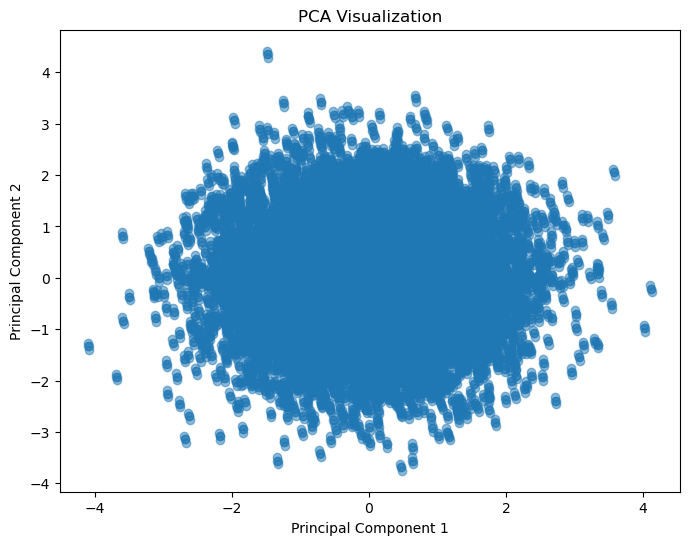

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


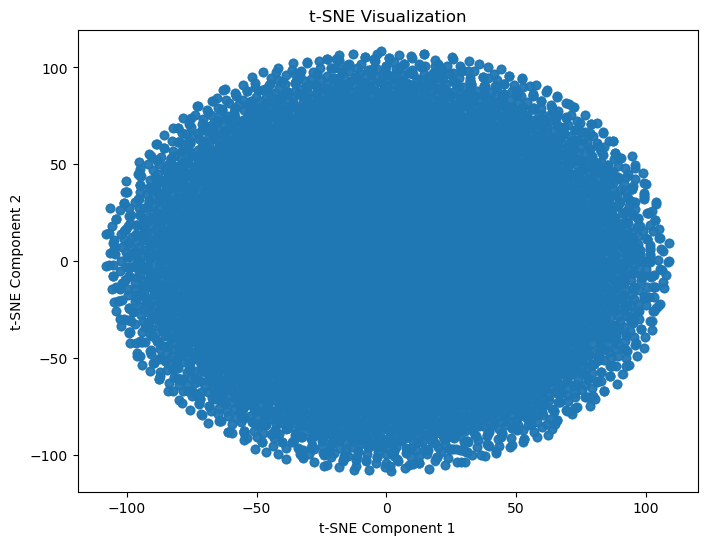

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()


In [89]:
# Visualize association rules
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence for Association Rules')
plt.show()

NameError: name 'rules' is not defined

<Figure size 800x600 with 0 Axes>